<a href="https://colab.research.google.com/github/nhi2527/MayHoc_2022_2023/blob/main/Lab_4_20130353_NguyenThiPhuongNhi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab is to continous dealing with **Logistic Regression**, **kNN**, and **Decision Tree** alogirthms applied to classification tasks. 

*   **Deadline: 23:59, 12/03/2023**



# Import libraries

In [1]:
# code
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#Task 1. 
Apply **LogisticRegression** to iris dataset which aims at classifying species of iris based on sepal_length (chiều dài đài hoa), sepal_width, petal_length (chiều dài cánh hoa), petal_width. The species are '**setosa**' '**versicolor**' and '**virginica**'. 



```
from sklearn import datasets
data4 = datasets.load_iris()
```




[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]

Accuracy:  0.9777777777777777
Precision:  0.9722222222222222
Recall:  0.9814814814814815
F1:  0.975983436853002 



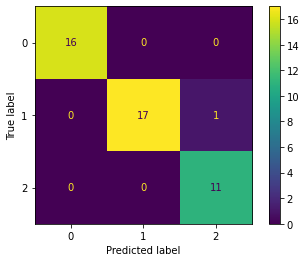

In [2]:
# code
classifier = LogisticRegression(random_state = 0) 
data4 = datasets.load_iris()
x= data4['data']
y= data4['target']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
#test_size phan tram chia de test, vd: test_size = 0.3 => 30 test, 70 train, random_state 
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='macro')
recall = metrics.recall_score(y_test, y_pred, average='macro')
f1 = metrics.f1_score(y_test, y_pred, average='macro')

print ("\nAccuracy: ", accuracy)
print ("Precision: ", precision)
print ("Recall: ", recall)
print ("F1: ", f1, "\n")


#Task 2. 
Apply LogisticRegression to **MNIST** dataset (mnist.csv) which aims at classifying handwritten digits. Dataset includes 784 pixels values of images (28x28). 


```
from sklearn import datasets
# load the MNIST digits dataset
mnist = datasets.load_digits()
```



[[45  0  0  0  0  0  0  0  0  0]
 [ 0 48  0  0  0  0  1  0  3  0]
 [ 0  1 50  2  0  0  0  0  0  0]
 [ 0  0  0 53  0  0  0  0  1  0]
 [ 0  0  0  0 47  0  0  1  0  0]
 [ 0  0  0  0  0 54  1  0  0  2]
 [ 0  1  0  0  0  0 59  0  0  0]
 [ 0  0  0  1  1  0  0 51  0  0]
 [ 0  2  1  0  0  0  1  0 54  3]
 [ 0  0  0  0  0  1  0  0  1 55]]

Accuracy:  0.9555555555555556
Precision:  0.9575185537802927
Recall:  0.9570245385310626
F1:  0.9570516755557739 



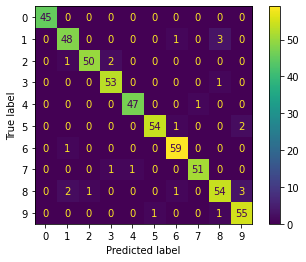

In [3]:

# code
mnist = datasets.load_digits()
classifier = LogisticRegression(solver='lbfgs', max_iter=10000) 
x= mnist['data']
y= mnist['target']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='macro')
recall = metrics.recall_score(y_test, y_pred, average='macro')
f1 = metrics.f1_score(y_test, y_pred, average='macro')

print ("\nAccuracy: ", accuracy)
print ("Precision: ", precision)
print ("Recall: ", recall)
print ("F1: ", f1, "\n")


#Task 3. 
Apply another classification algorithm named kNN, which is an instance classifcation model. 
*  3.1. Perform kNN algorithm to Iris dataset with k={1, 3, 5, …, 29}. Select the best value of k.

*   3.2. Then compare the obtained results with those using Logistic regression (based on metrics: accuracy, precision, recall, f1 measure).


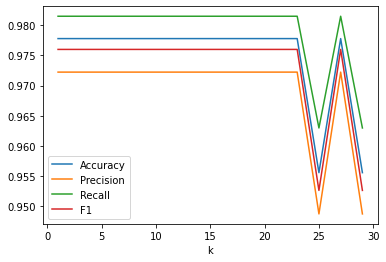

In [4]:
# code
data4 = datasets.load_iris()
x= data4['data']
y= data4['target']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
k_range = range(1, 30, 2)
accuracy =[]
precision = []
recall = []
f1 = []
for k in k_range:
  KNN = KNeighborsClassifier(n_neighbors = k)
  KNN.fit(X_train, y_train)
  y_pred = KNN.predict(X_test)
  accuracy.append(metrics.accuracy_score(y_test, y_pred))
  precision.append(metrics.precision_score(y_test, y_pred,average='macro'))
  recall.append(metrics.recall_score(y_test, y_pred,average='macro'))
  f1.append(metrics.f1_score(y_test, y_pred,average='macro'))


plt.plot(k_range, accuracy, label='Accuracy')
plt.plot(k_range, precision, label='Precision')
plt.plot(k_range, recall, label='Recall')
plt.plot(k_range, f1, label='F1')
plt.xlabel("k")
plt.legend()

#Task 4. 
Similar to Task 3, apply kNN algorithm to **mnist** dataset which included in datasets of sklearn API.
*  4.1.	Perform kNN algorithm to Iris dataset with k={1, 3, 5, …, 29}. Select the best value of k.
*  4.2.	Then compare the obtained results with those using Logistic regression (based on metrics: accuracy, precision, recall, f1 measure).


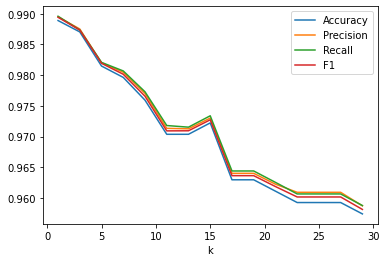

In [5]:
# code
data4 = datasets.load_digits()
x= data4['data']
y= data4['target']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
k_range = range(1,30,2)
accuracy =[]
precision = []
recall = []
f1 = []
for k in k_range:
  KNN = KNeighborsClassifier(n_neighbors = k)
  KNN.fit(X_train, y_train)
  y_pred = KNN.predict(X_test)
  accuracy.append(metrics.accuracy_score(y_test, y_pred))
  precision.append(metrics.precision_score(y_test, y_pred,average='macro'))
  recall.append(metrics.recall_score(y_test, y_pred,average='macro'))
  f1.append(metrics.f1_score(y_test, y_pred,average='macro'))

plt.plot(k_range, accuracy, label='Accuracy')
plt.plot(k_range, precision, label='Precision')
plt.plot(k_range, recall, label='Recall')
plt.plot(k_range, f1, label='F1')
plt.xlabel("k")
plt.legend()


#Task 5. 
Compare the performance of selected classification algorithms (**Decision Treen, kNN, and Logistic Regression**) to ***spam detection***. The dataset can be accessed from the link: http://archive.ics.uci.edu/ml/datasets/Spambase 
Attribute Information:
The last column of 'spambase.csv denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes: 
*  48 continuous real [0,100] attributes of type word_freq_WORD 
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. **Example**: word_freq_address: percentage of words in the e-mail that match ADDRESS.
*  6 continuous real [0,100] attributes of type char_freq_CHAR] 
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail
*  1 continuous real [1,...] attribute of type capital_run_length_average 
= average length of uninterrupted sequences of capital letters
*  1 continuous integer [1,...] attribute of type capital_run_length_longest 
= length of longest uninterrupted sequence of capital letters
*  1 continuous integer [1,...] attribute of type capital_run_length_total = sum of length of uninterrupted sequences of capital letters = total number of capital letters in the e-mail
*  1 nominal {0,1} class attribute of type spam = denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. 


---


In order to compare the performance of selected algorithms, some common metrics including **accuracy, precision, recall, f1 measures** could be used.


In [9]:
# code
# len UCI lay datasheet, doc du lieu tu file, spambase.csv
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/MayHoc_2022_2023/Lab4'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/MayHoc_2022_2023/Lab4


In [10]:
# cay quyet dinh
df = pd.read_csv("spambase.csv")
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


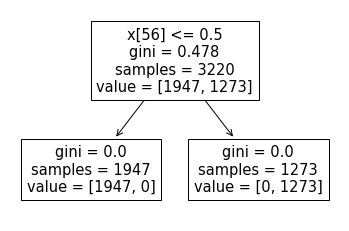

In [11]:
X = df.drop('word_freq_make', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=3, min_samples_leaf=5) 
clf_model.fit(X_train,y_train)
tree.plot_tree(clf_model)
y_predict = clf_model.predict(X_test)

#Finally,
Save a copy in your Github. Remember renaming the notebook.